In [1]:
#Se importan librerías esenciales
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Montamos nuestro Google Drive con el set de datos
#from google.colab import drive
#drive.mount('/content/gdrive') #Se da click en el URL que aparece y se ingresa la clave de autorización

In [3]:
#os.chdir('/content/gdrive/My Drive/Proyecto_Final_MNO/data')
#print("Directorio del Proyecto Final" , os.getcwd())

In [4]:
#Se obtiene una vista inicial se los datos
nutricion = pd.read_csv("../../data/nndb_flat.csv")
nutricion.head(10)

ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   
5  1006  Dairy and Egg Products               CHEESE,BRIE   
6  1007  Dairy and Egg Products          CHEESE,CAMEMBERT   
7  1008  Dairy and Egg Products            CHEESE,CARAWAY   
8  1009  Dairy and Egg Products            CHEESE,CHEDDAR   
9  1010  Dairy and Egg Products           CHEESE,CHESHIRE   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN          717   
1  Butter, whipped, with salt        NaN     NaN            NaN          717   
2       Butter oil, anhydrous        NaN     NaN            NaN          876   
3                Cheese, blue        NaN     NaN            NaN          353   
4               Cheese, brick        NaN     NaN            NaN          371   
5                Cheese, brie        NaN     NaN            NaN          334   
6           Cheese, camembert        NaN     NaN            NaN          300   
7             Cheese, caraway        NaN     NaN            NaN          376   
8             Cheese, cheddar        NaN     NaN            NaN          406   
9            Cheese, cheshire        NaN     NaN            NaN          387   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  \
0       0.85  81.11  ...        0.0075      0.002625          0.026154   
1       0.85  81.11  ...        0.0075      0.002625          0.026154   
2       0.28  99.48  ...        0.0000      0.000188          0.003846   
3      21.40  28.74  ...        0.0900      0.063500          0.293846   
4      23.24  29.68  ...        0.0500      0.007375          0.270000   
5      20.75  27.68  ...        0.1625      0.023750          0.400000   
6      19.80  24.26  ...        0.1550      0.039375          0.375385   
7      25.18  29.20  ...        0.0450      0.011250          0.346154   
8      24.04  33.82  ...        0.0650      0.002437          0.333846   
9      23.37  30.60  ...        0.0450      0.005000          0.225385   

   Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  \
0       0.004167       0.020000      0.000000         0.004762   
1       0.004167       0.020000      0.000018         0.004762   
2       0.000833       0.003333      0.000001         0.000000   
3       0.024167       0.440000      0.000044         0.054762   
4       0.011667       0.561667      0.000027         0.057143   
5       0.058333       0.153333      0.000021         0.047619   
6       0.023333       0.323333      0.000023         0.047619   
7       0.025833       0.560833      0.000027         0.052381   
8       0.022500       0.562500      0.000062         0.064286   
9       0.038333       0.535833      0.000047         0.050000   

   Phosphorus_USRDA  Selenium_USRDA  Zinc_USRDA  
0          0.034286        0.018182    0.008182  
1          0.032857        0.018182    0.004545  
2          0.004286        0.000000    0.000909  
3          0.552857        0.263636    0.241818  
4          0.644286        0.263636    0.236364  
5          0.268571        0.263636    0.216364  
6          0.495714        0.263636    0.216364  
7          0.700000        0.263636    0.267273  
8          0.675714        0.514545    0.311818  
9          0.662857        0.263636    0.253636  

[10 rows x 45 columns]

In [5]:
nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   int64  
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   int64  
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [6]:
#nutricion = nutricion.drop(columns=['ID','FoodGroup','ShortDescrip','Descrip','CommonName','MfgName','ScientificName'])

In [7]:
#Vista de los valores únicos del set de cuestionarios, al ser 154 preguntas no dejaremos esta visualizacion dentro del Github
#NOTA: Lo comenté por que salen listas muy largas, pro rapidez
#for col in list(nutricion):
#    print(col)
#    print(nutricion[col].unique())

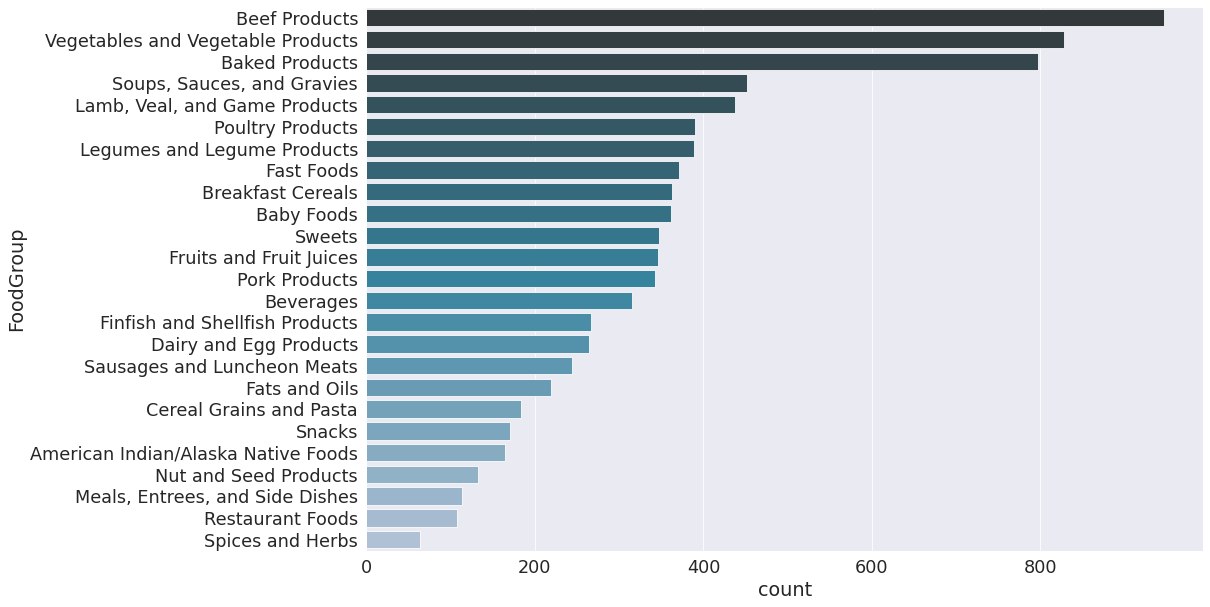

In [8]:
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2)     
plt.figure(figsize=(15, 10))
ax = sns.countplot(y="FoodGroup", data=nutricion,order = nutricion['FoodGroup'].value_counts().index, palette="PuBuGn_d")

Text(0, 0.5, 'Grupo de alimento')

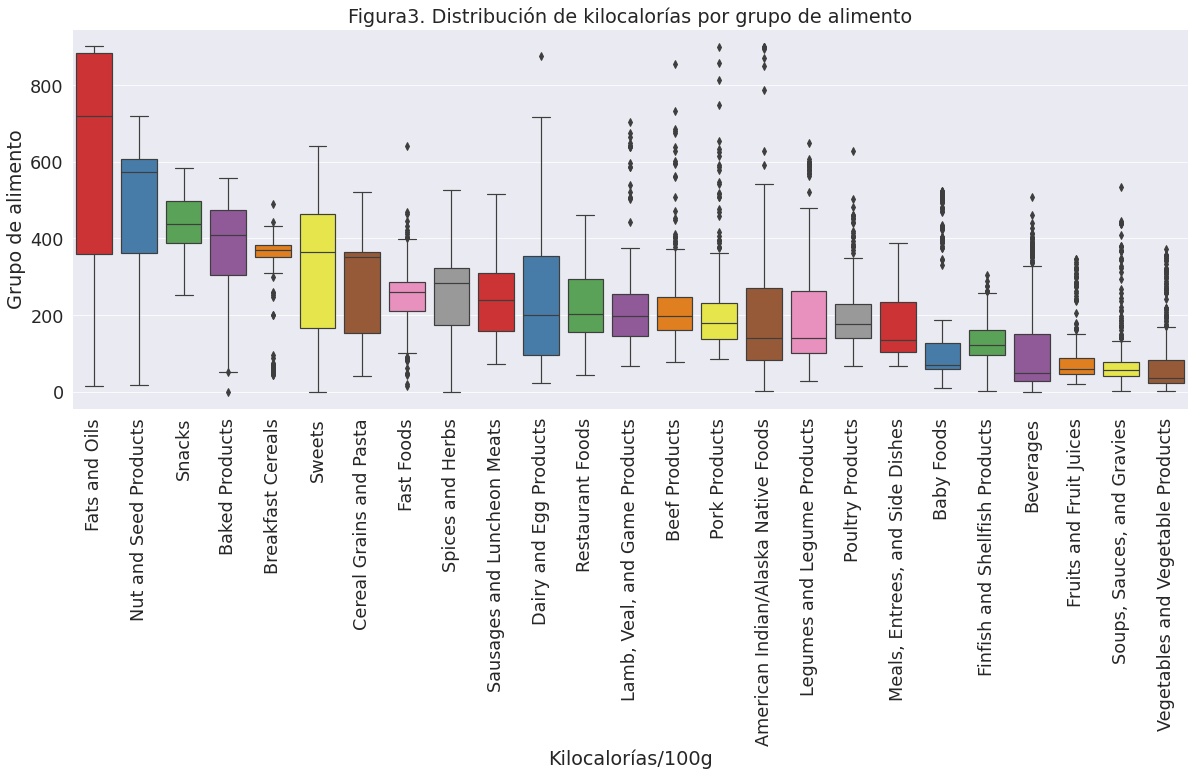

In [9]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Energy_kcal'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Energy_kcal, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

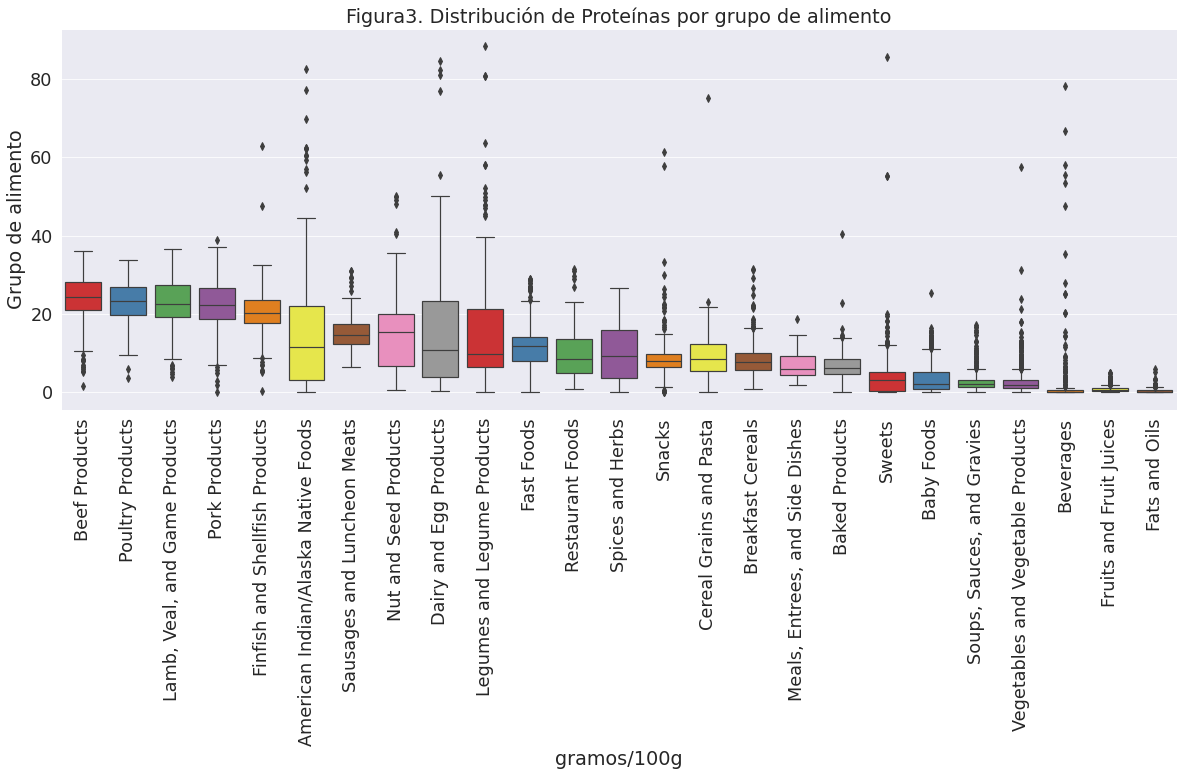

In [10]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Protein_g'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Protein_g, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de Proteínas por grupo de alimento')
kcal.set_xlabel('gramos/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

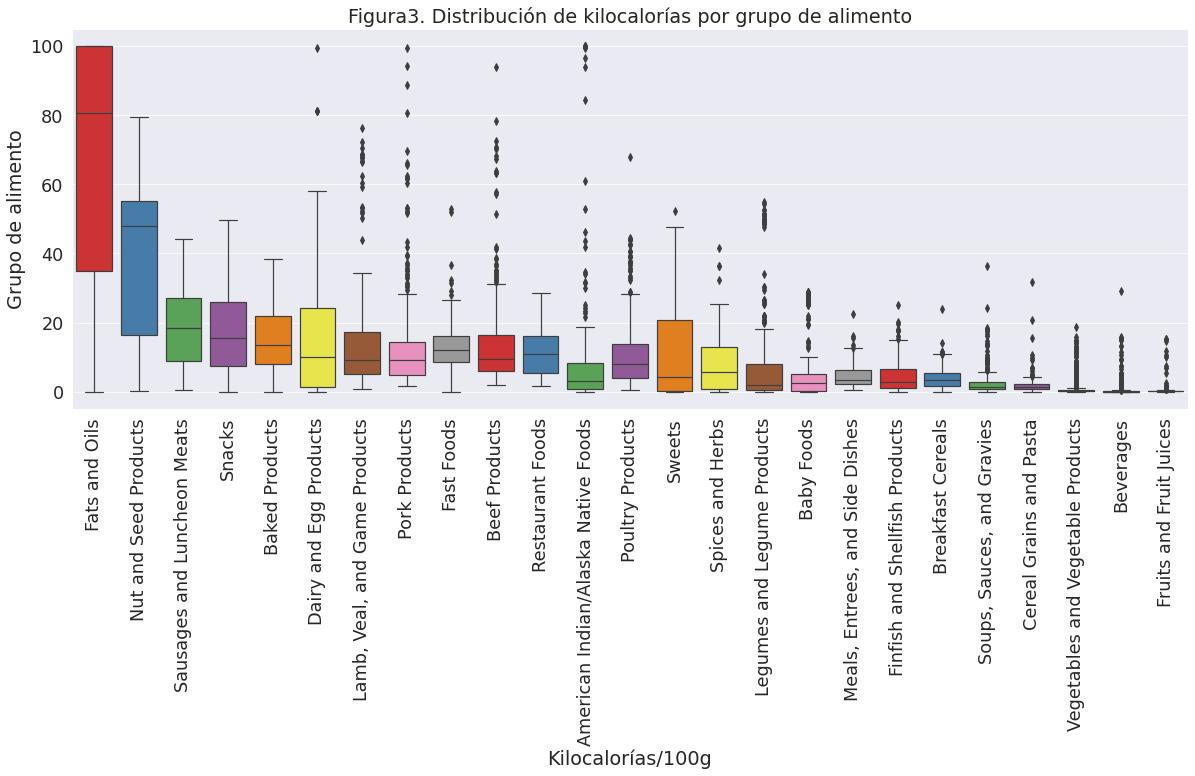

In [11]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Fat_g'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Fat_g, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

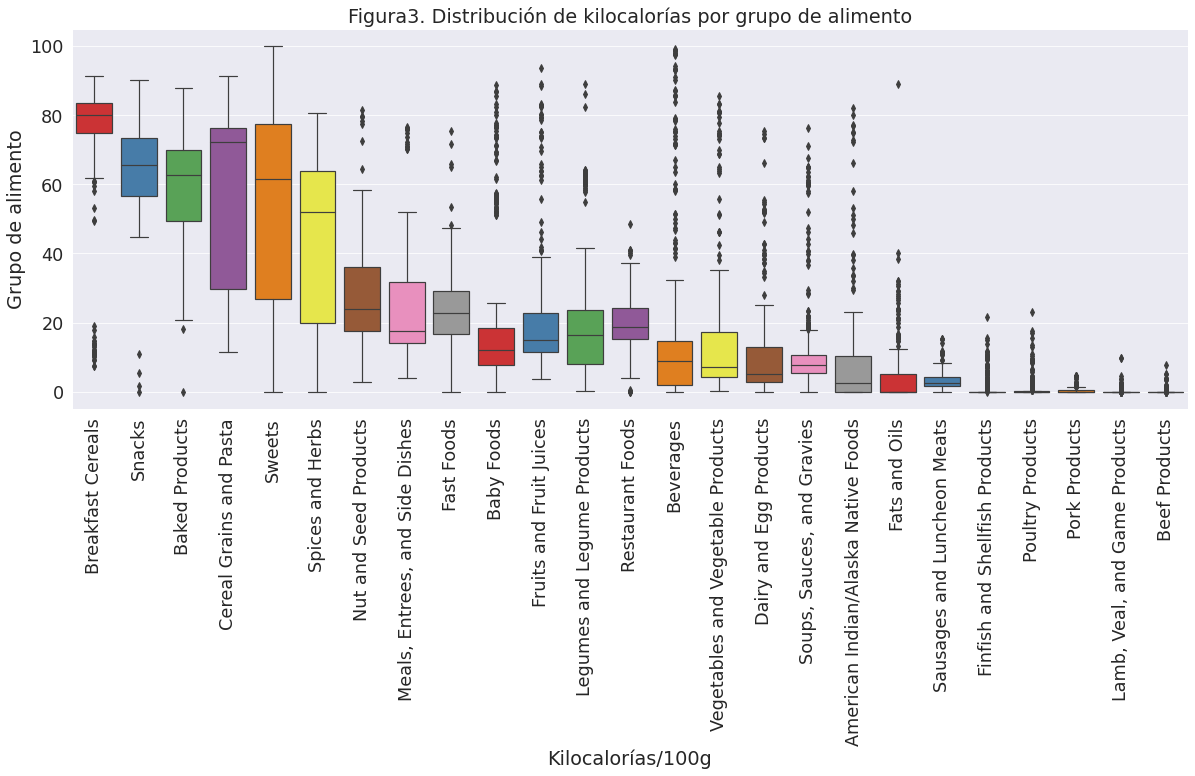

In [12]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Carb_g'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Carb_g, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

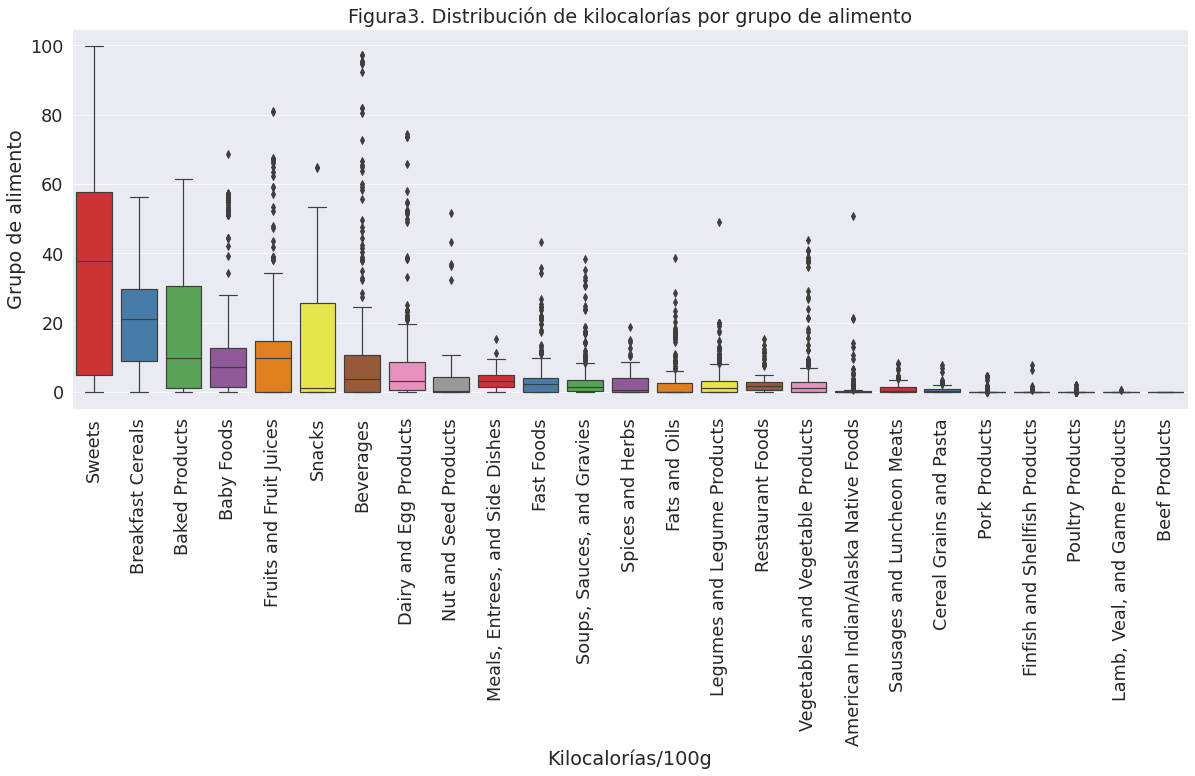

In [13]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Sugar_g'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Sugar_g, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

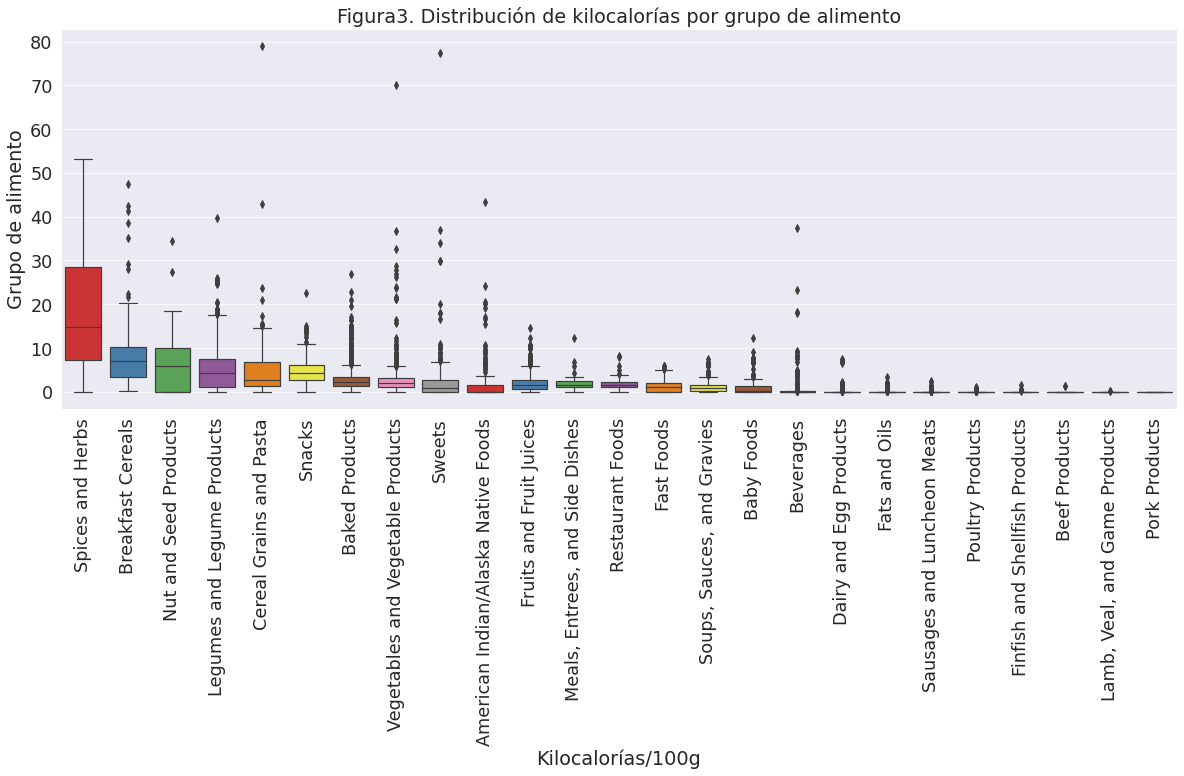

In [14]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Fiber_g'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Fiber_g, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

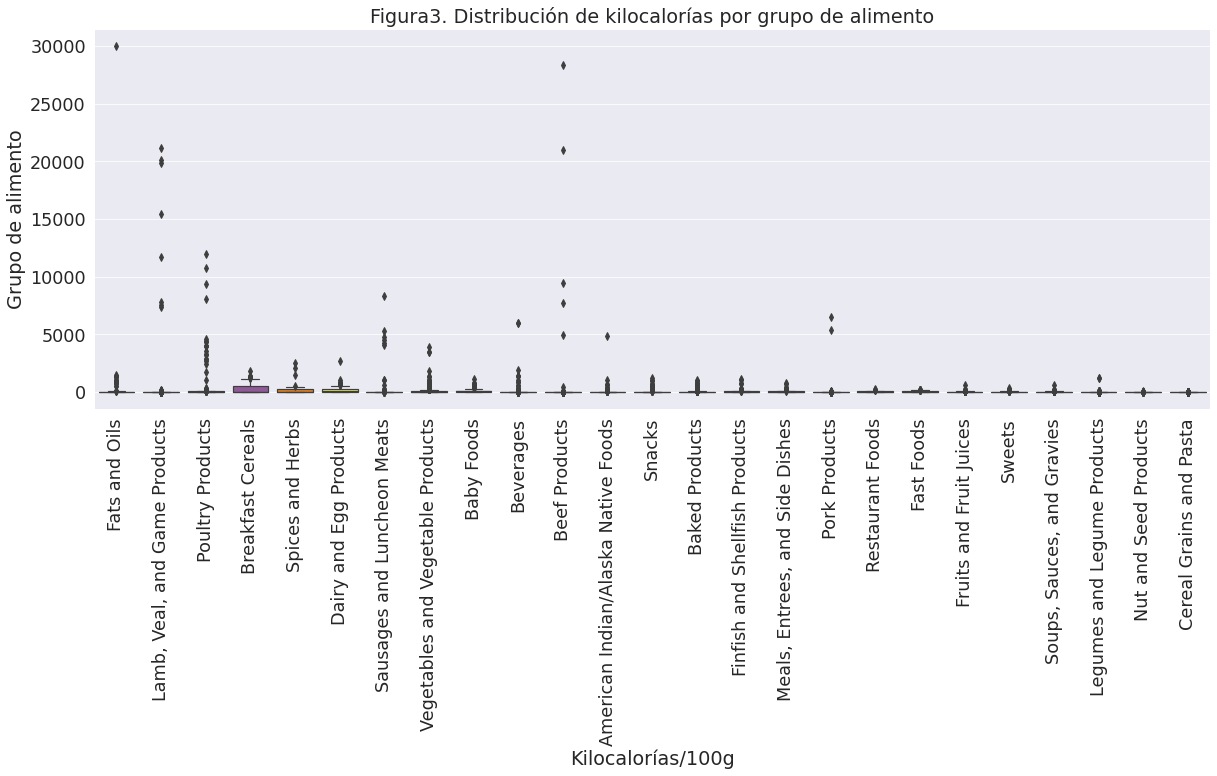

In [15]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['VitA_mcg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.VitA_mcg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

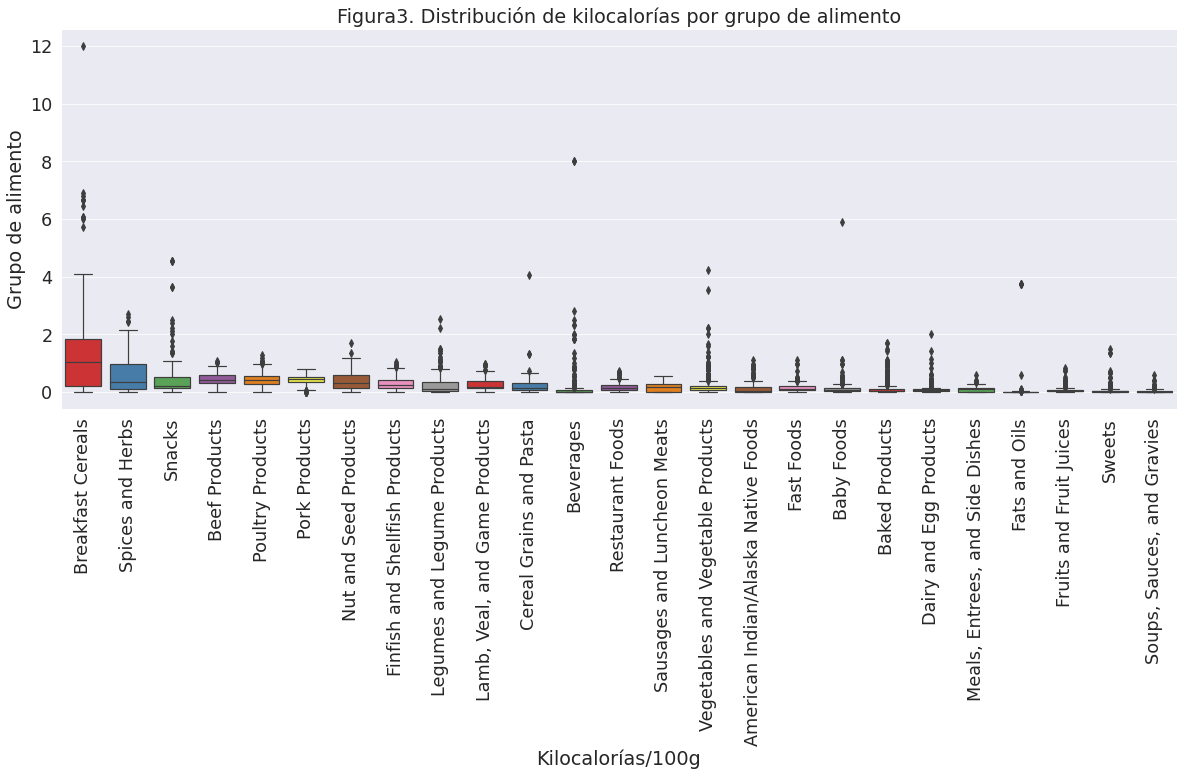

In [16]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['VitB6_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.VitB6_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

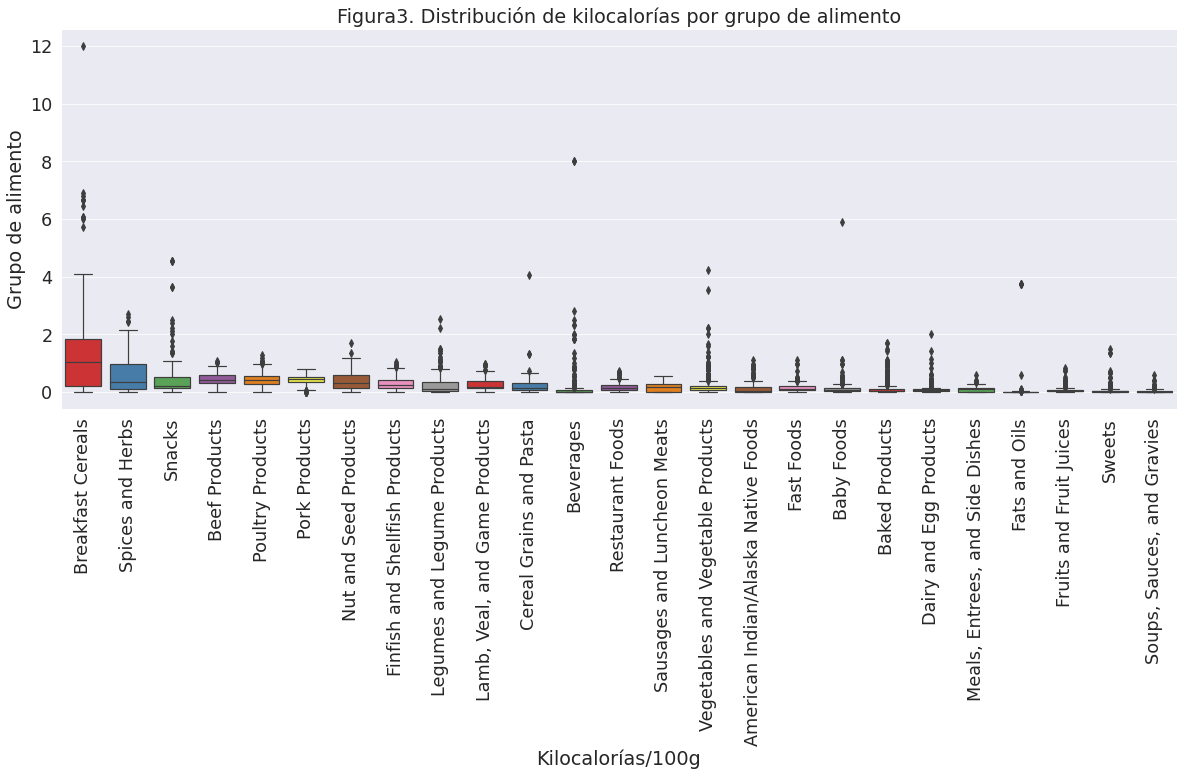

In [17]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['VitB6_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.VitB6_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

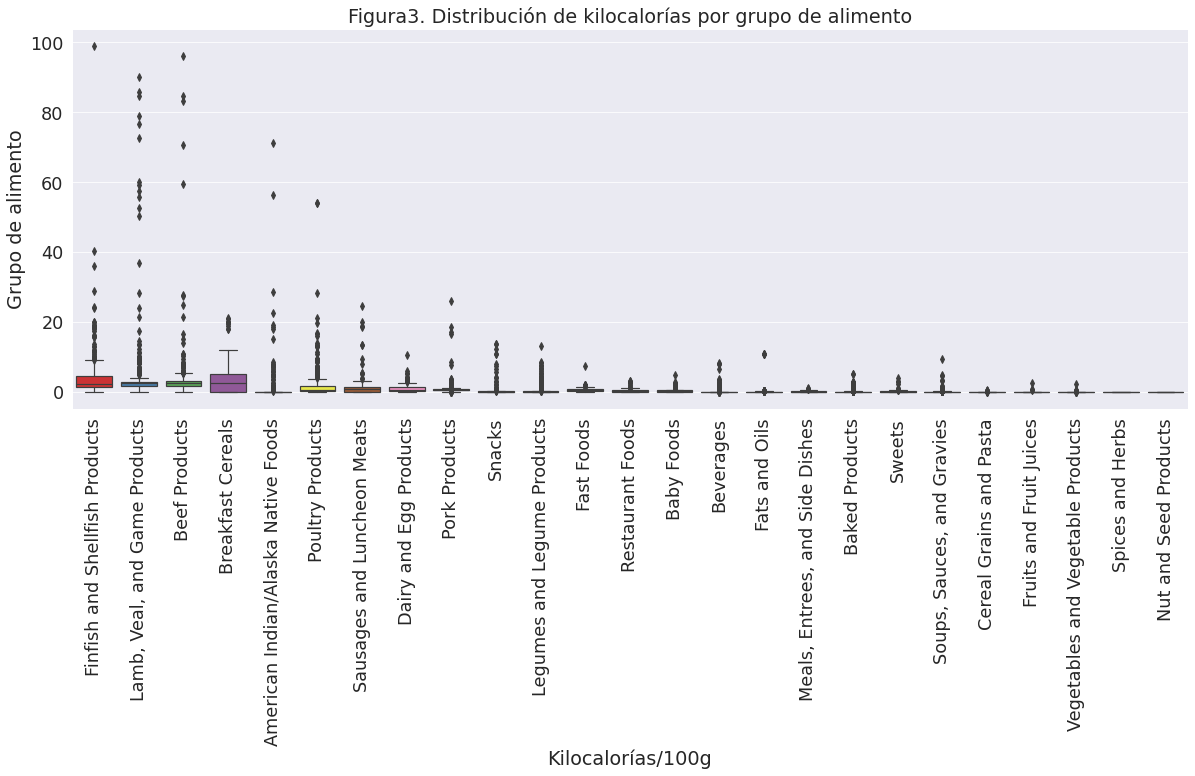

In [18]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['VitB12_mcg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.VitB12_mcg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

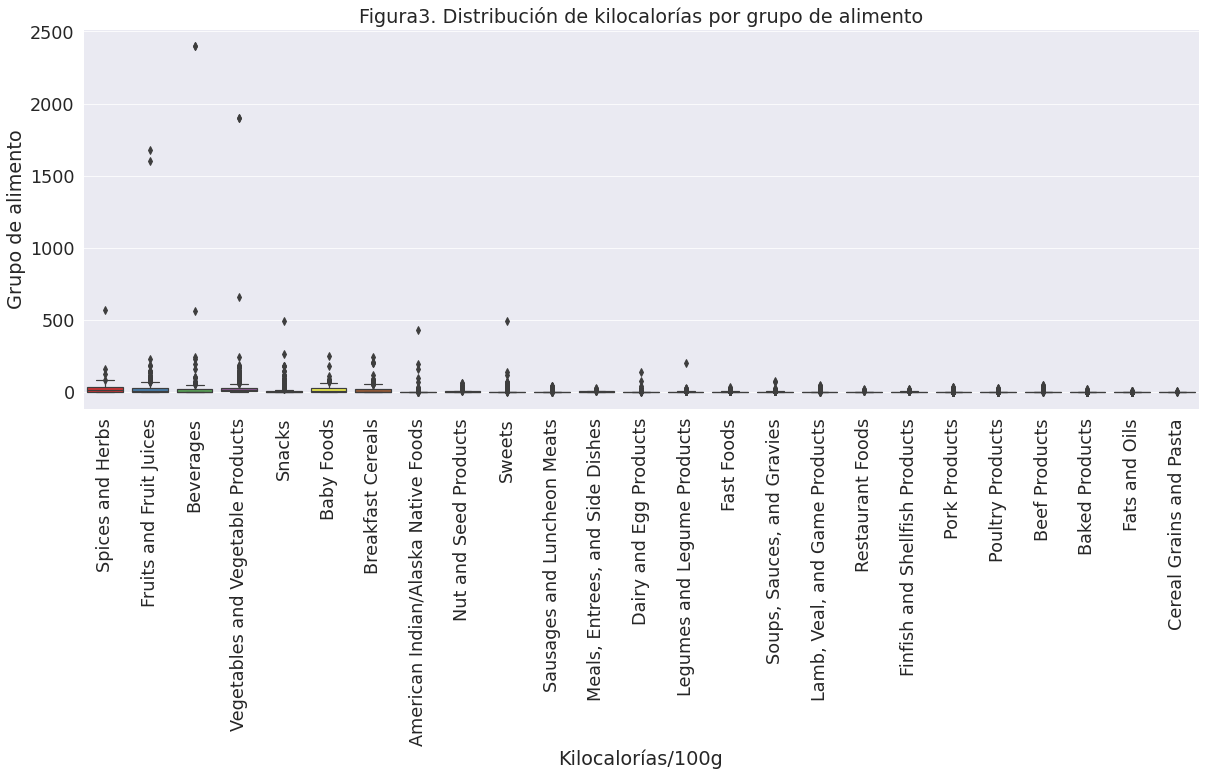

In [19]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['VitC_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.VitC_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

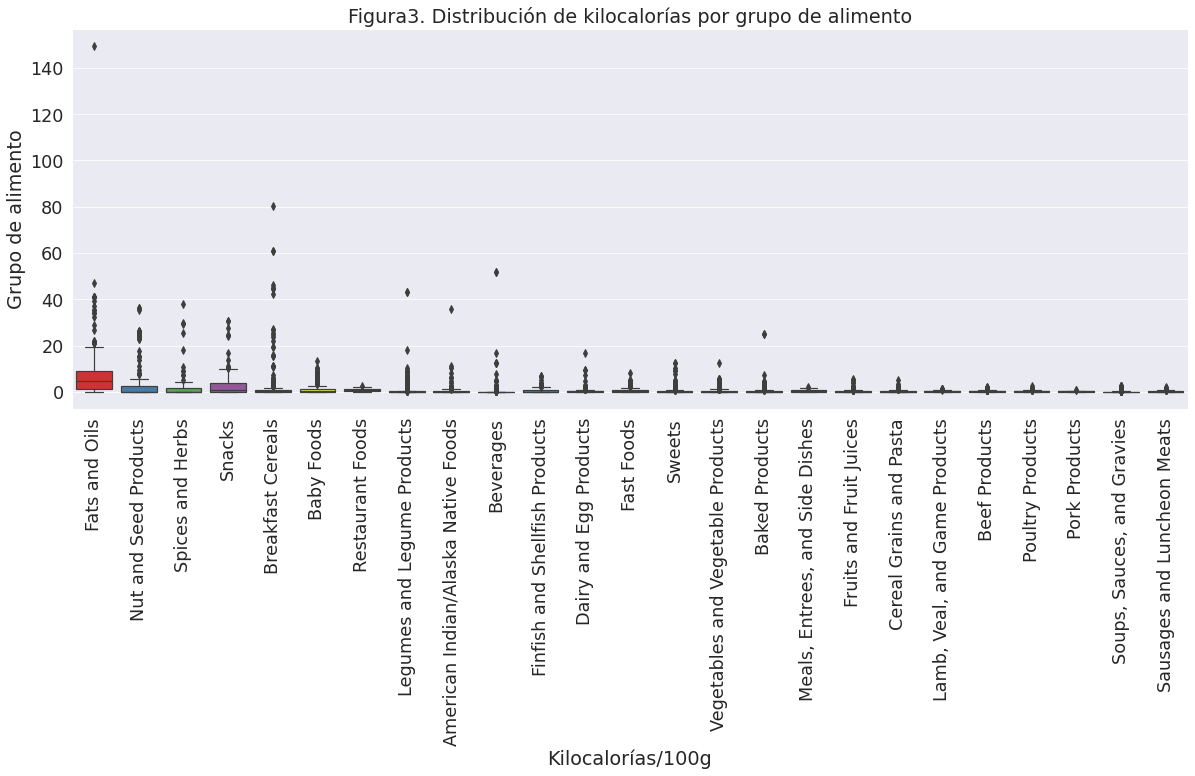

In [20]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['VitE_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.VitE_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

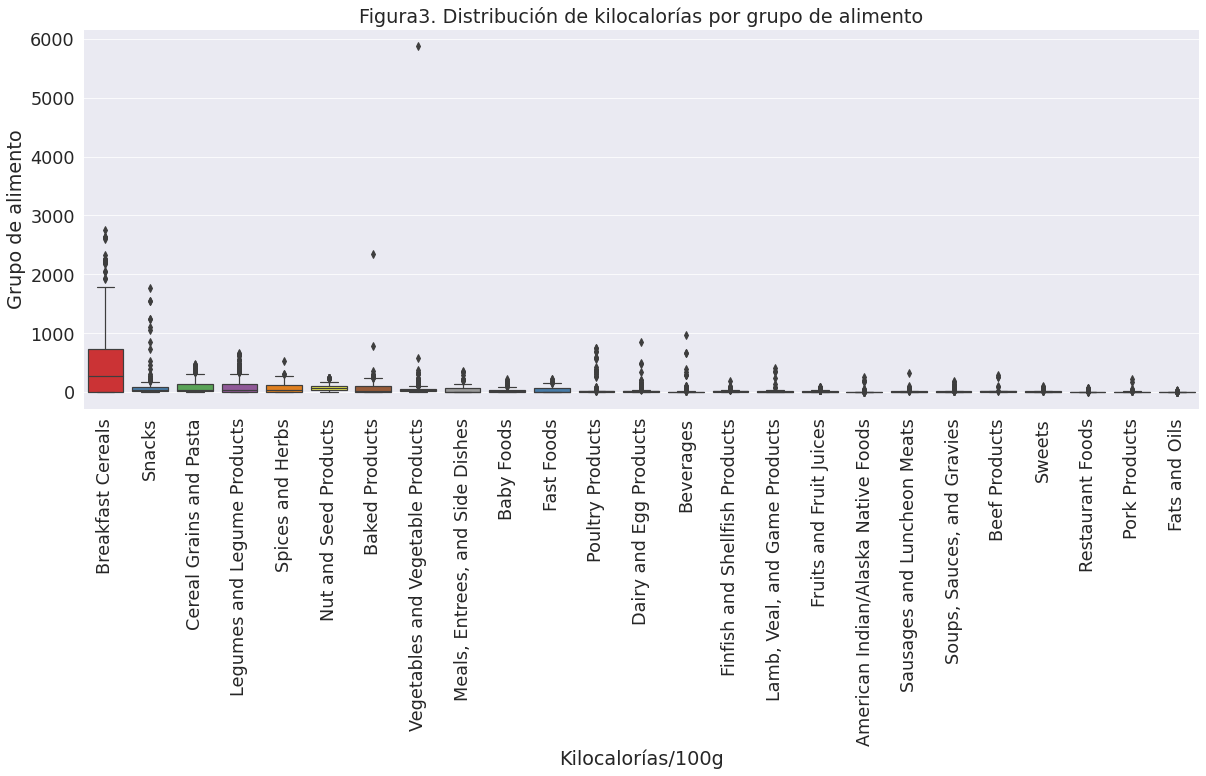

In [21]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Folate_mcg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Folate_mcg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

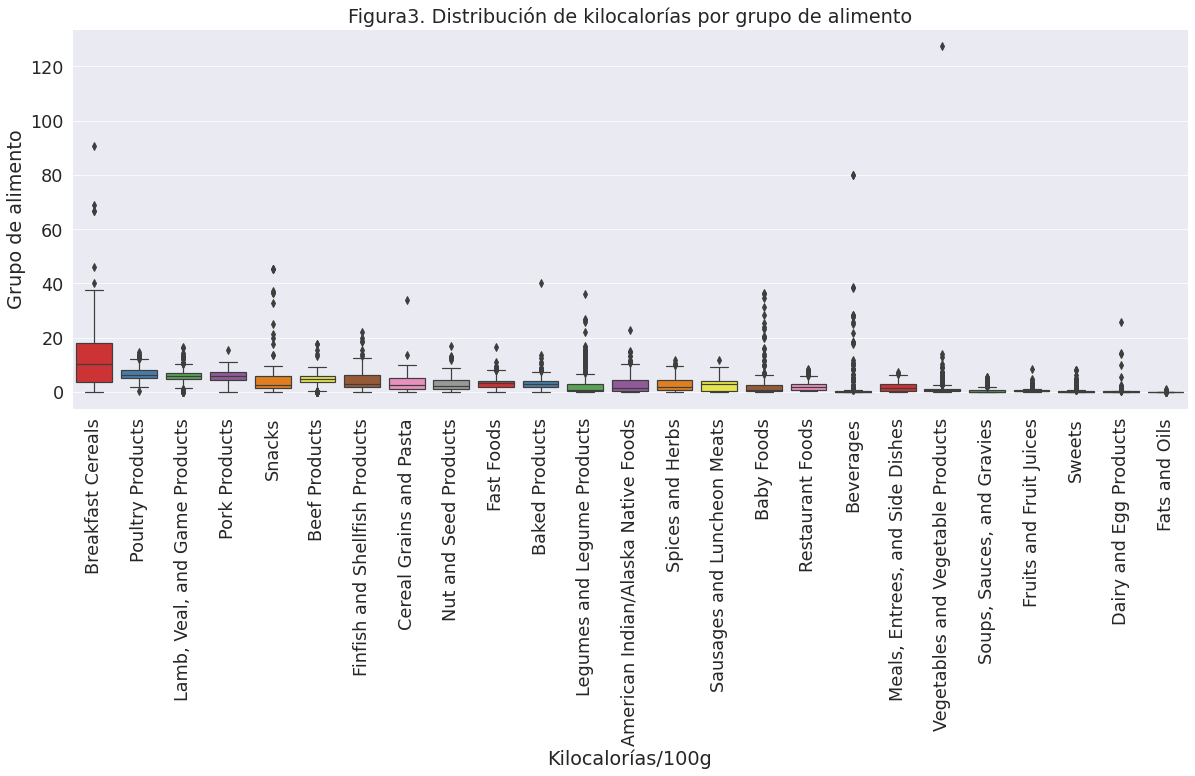

In [22]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Niacin_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Niacin_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

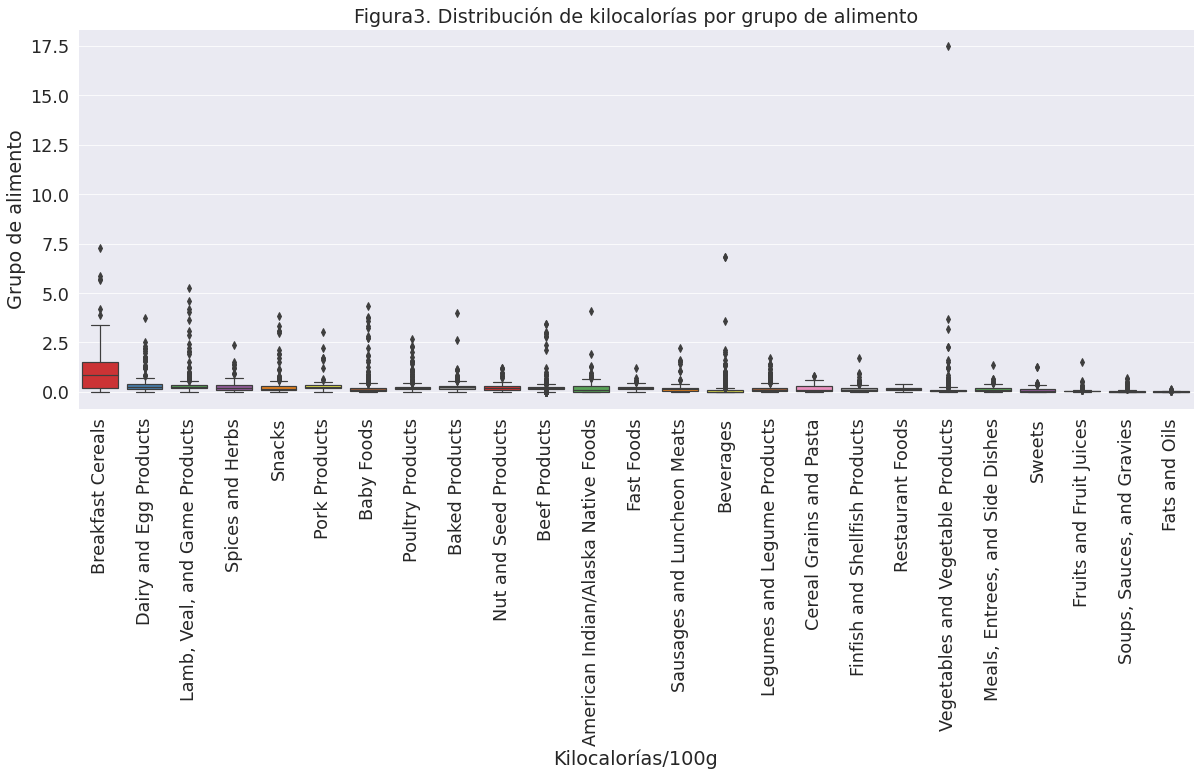

In [23]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Riboflavin_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Riboflavin_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

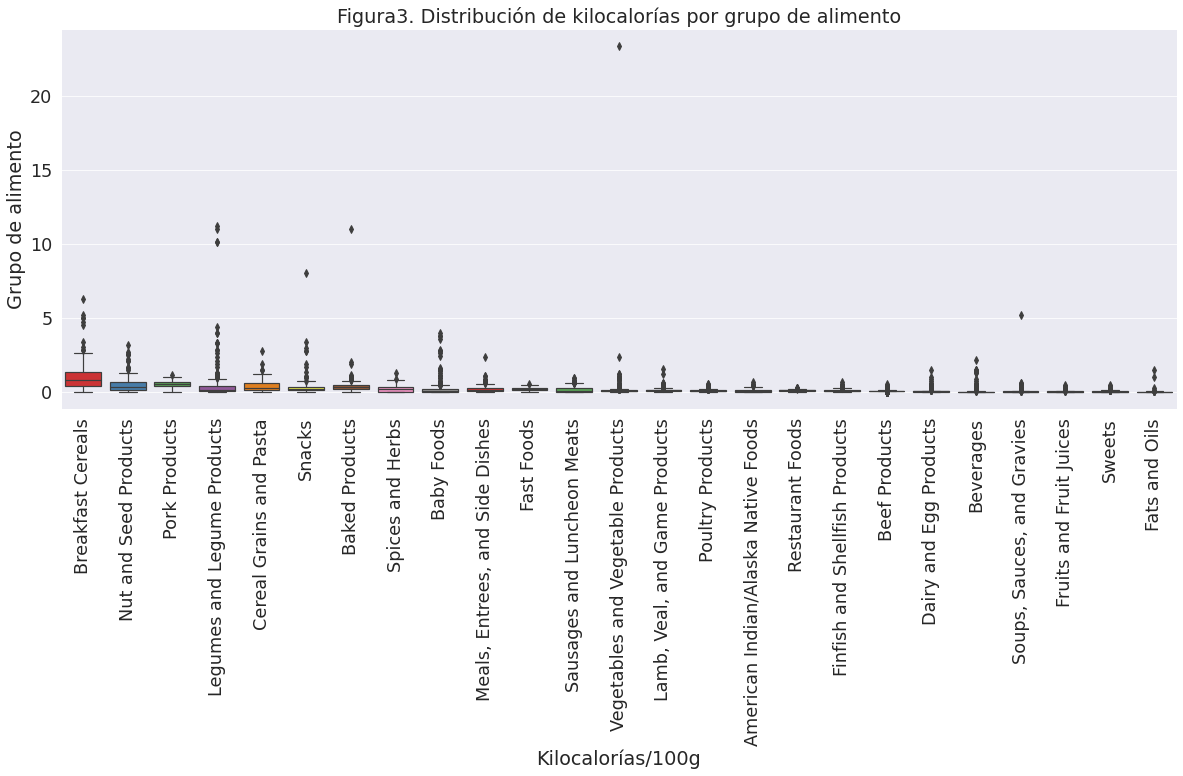

In [24]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Thiamin_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Thiamin_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

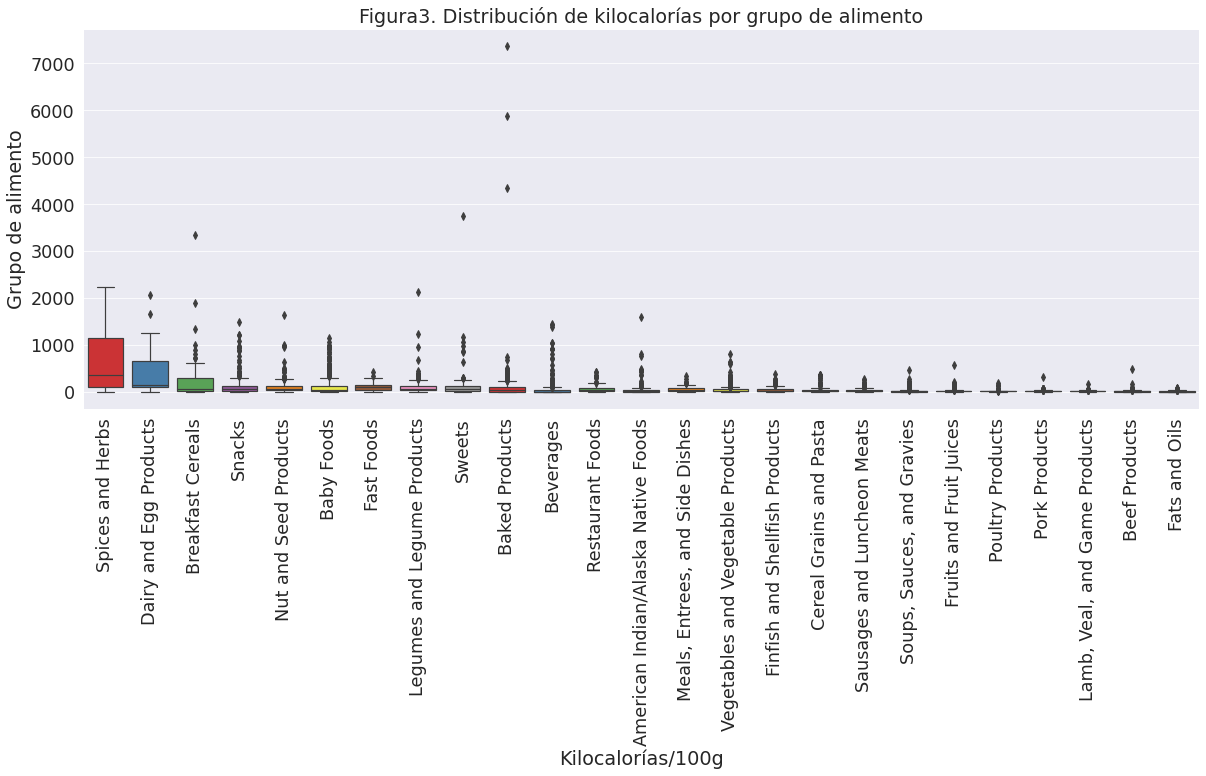

In [25]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Calcium_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Calcium_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

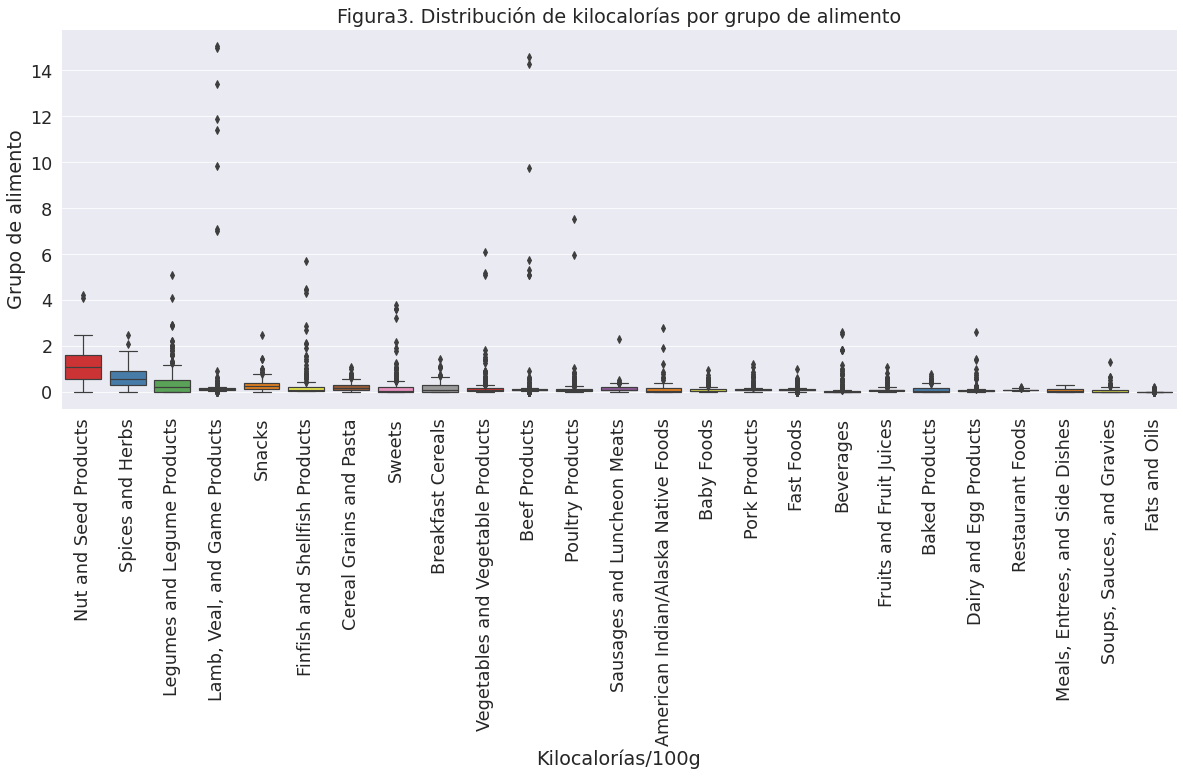

In [26]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Copper_mcg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Copper_mcg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

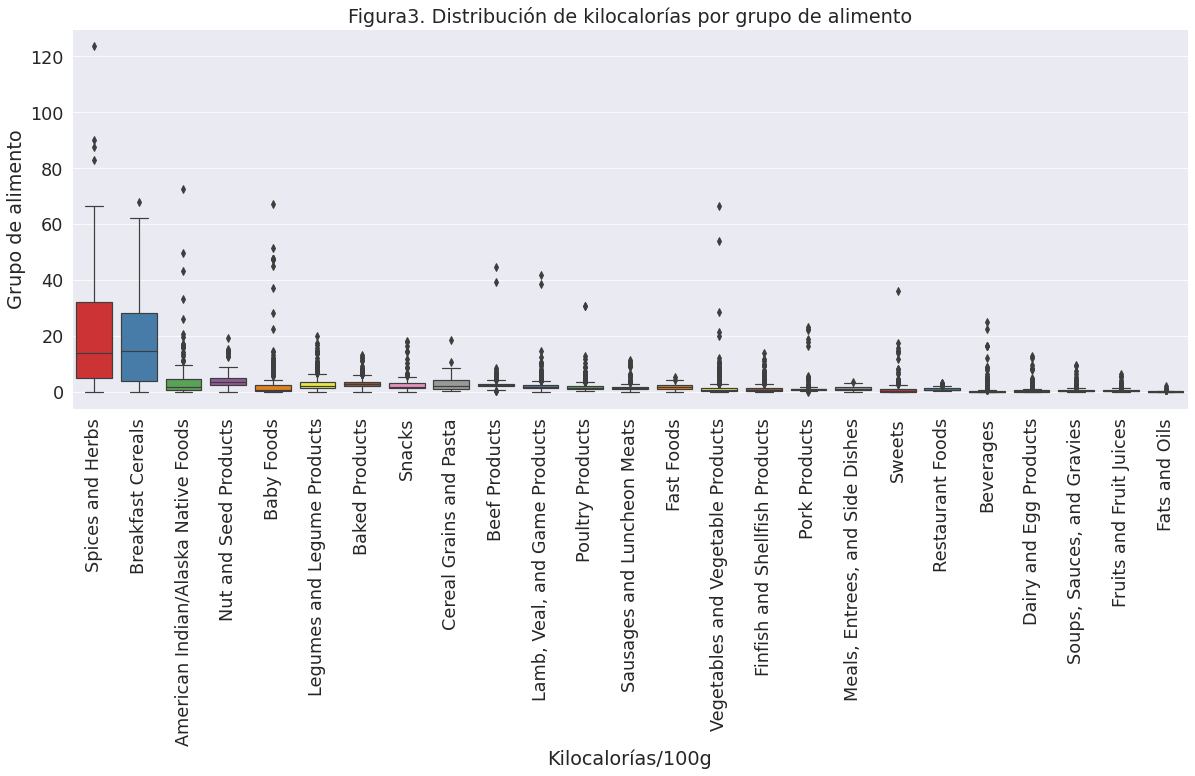

In [27]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Iron_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Iron_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

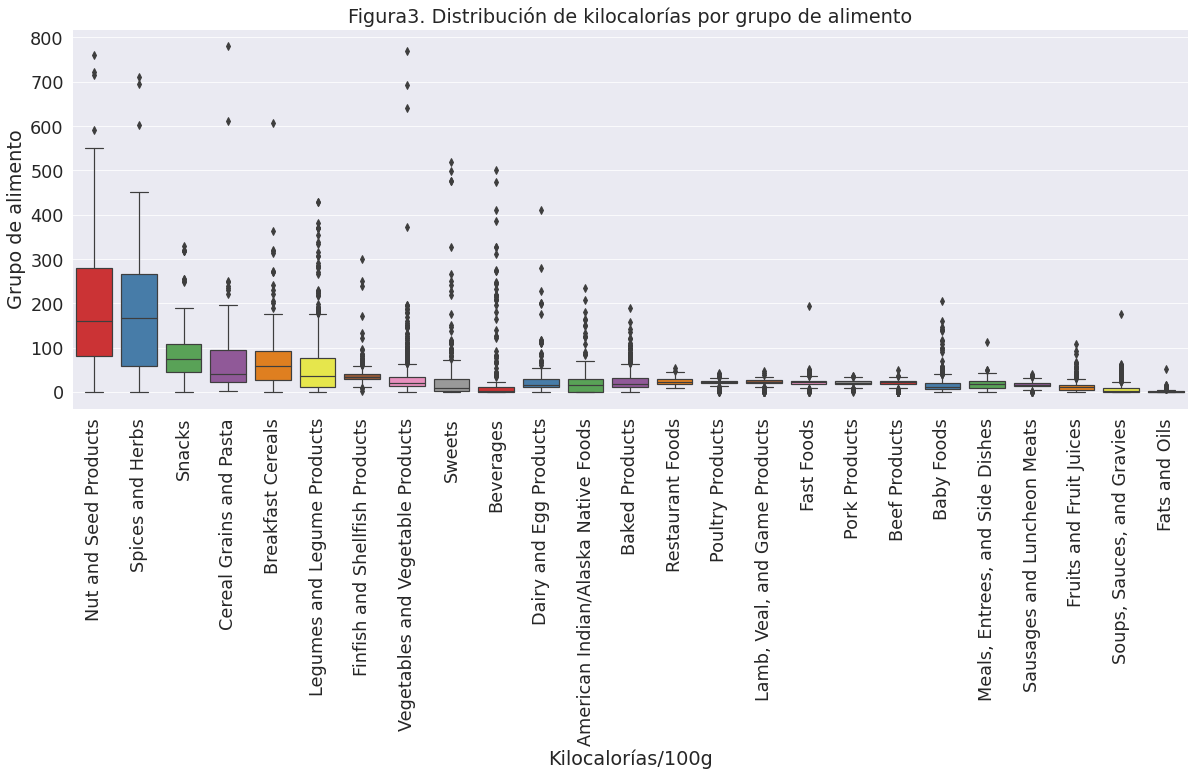

In [28]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Magnesium_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Magnesium_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

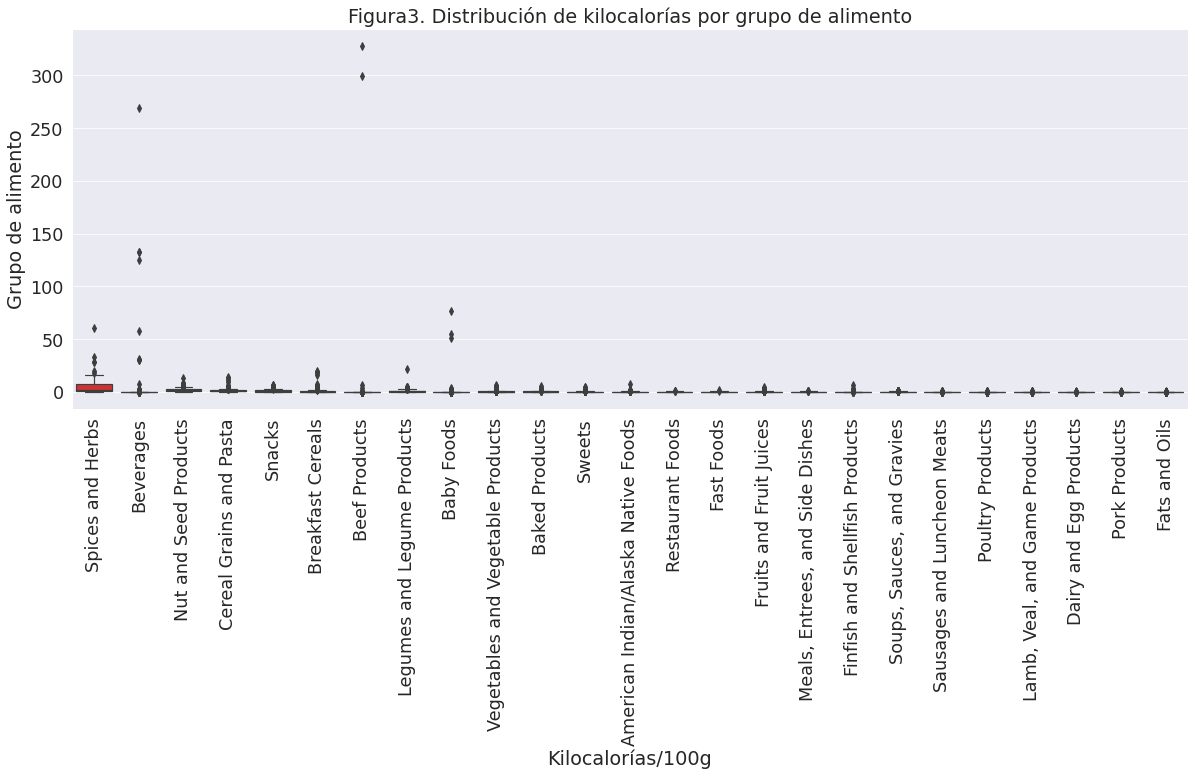

In [29]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Manganese_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Manganese_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

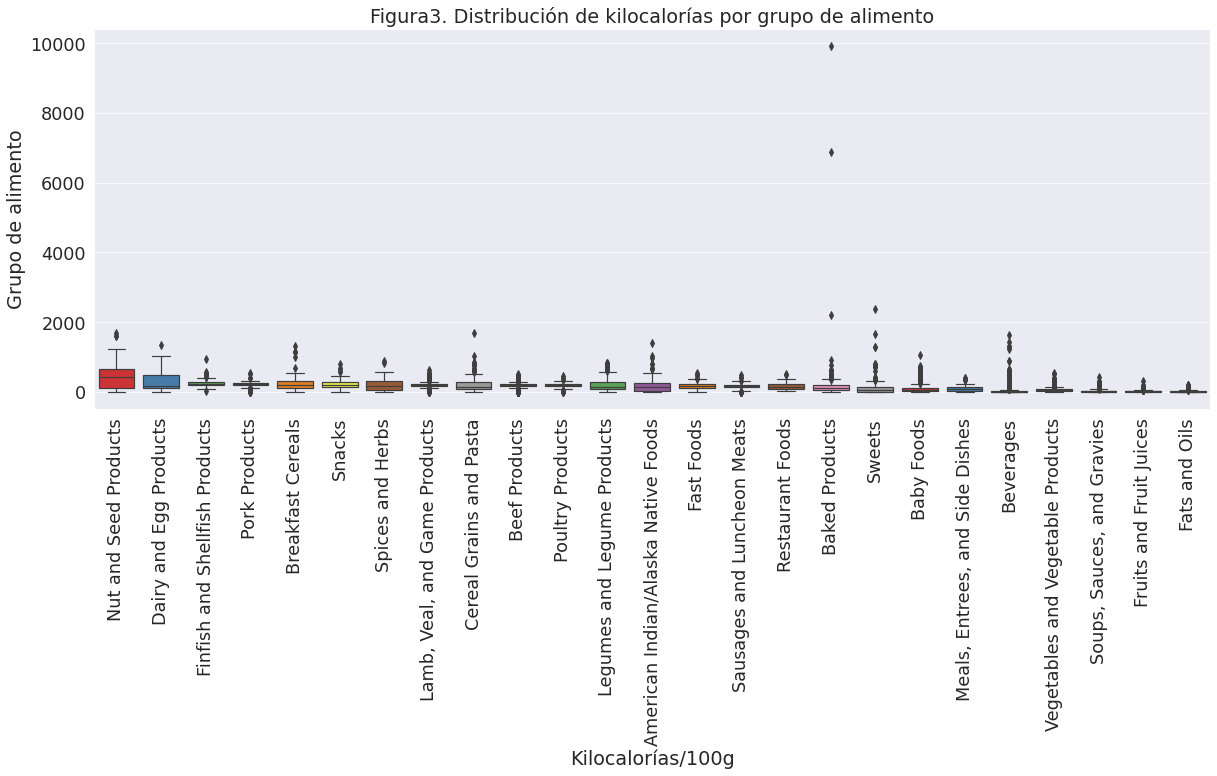

In [30]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Phosphorus_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Phosphorus_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

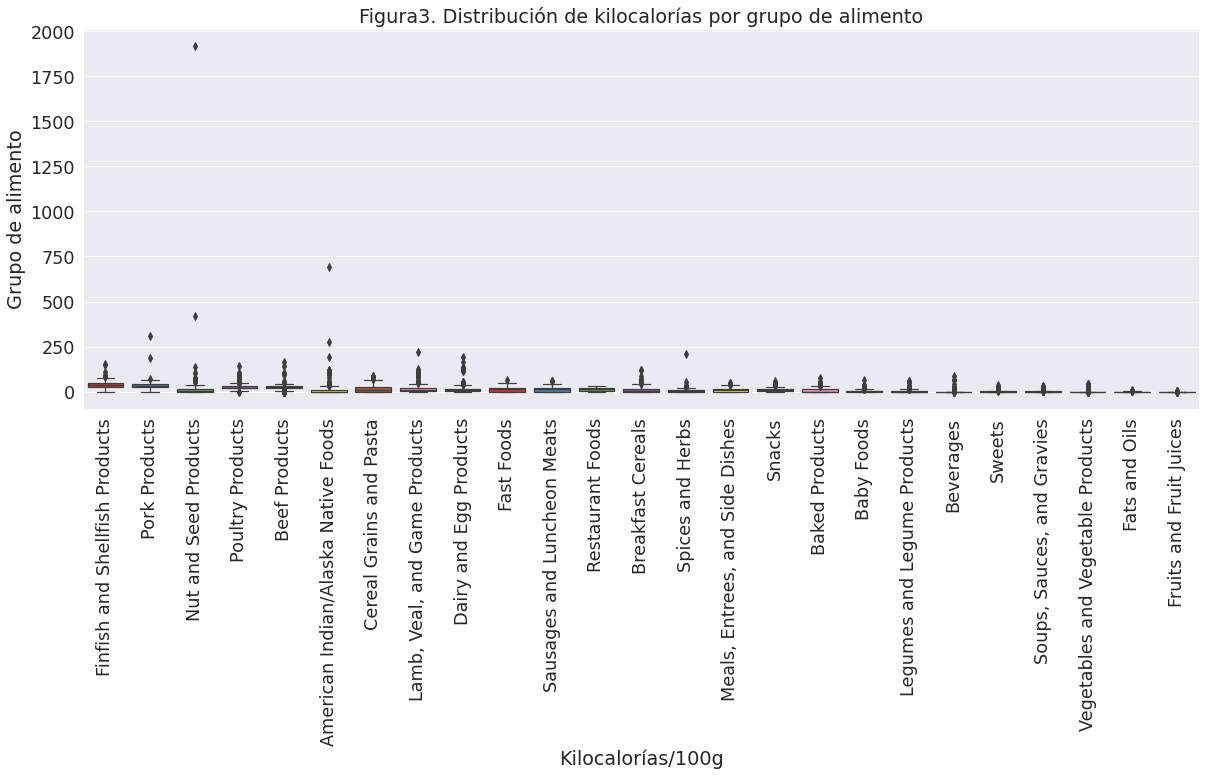

In [31]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Selenium_mcg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Selenium_mcg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

Text(0, 0.5, 'Grupo de alimento')

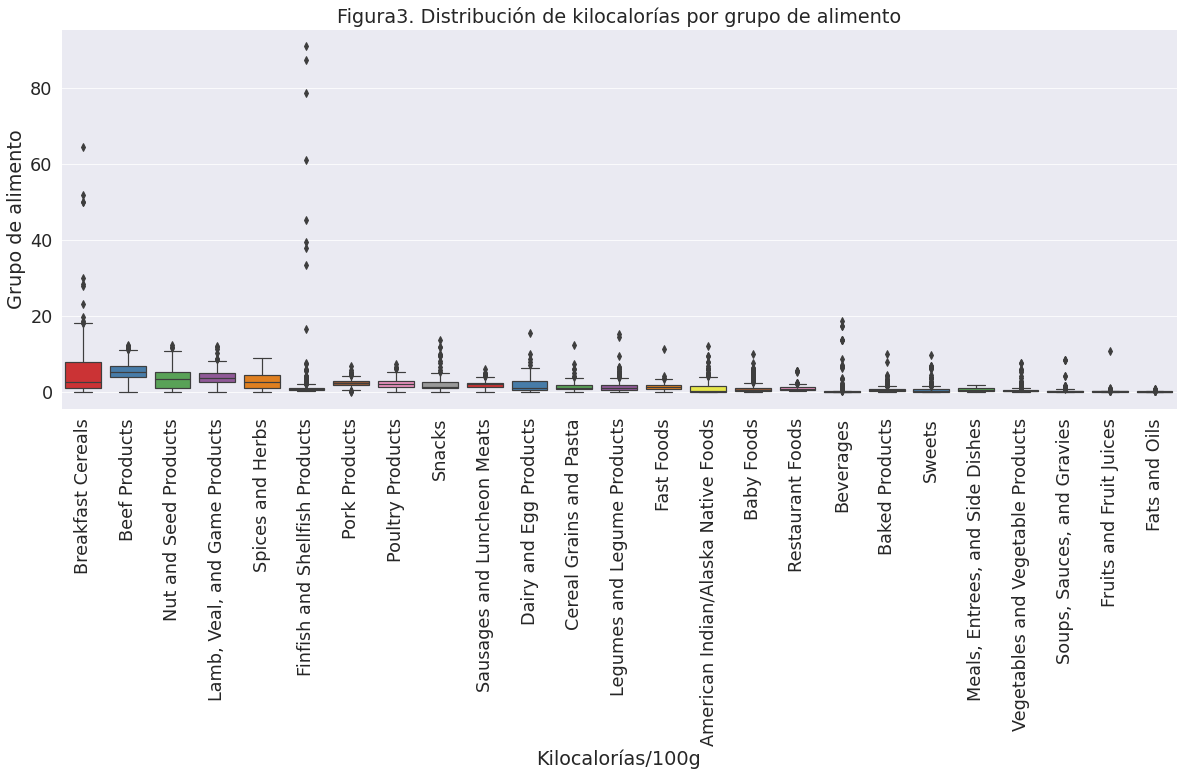

In [32]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2) 
plt.figure(figsize=(20, 7))
ranks_kcal = nutricion.groupby('FoodGroup')['Zinc_mg'].mean().fillna(0).sort_values()[::-1].index
kcal=sns.boxplot(nutricion['FoodGroup'], nutricion.Zinc_mg, palette='Set1',order = ranks_kcal)
kcal.set_xticklabels(kcal.get_xticklabels(),rotation=90)
kcal.set_title('Figura3. Distribución de kilocalorías por grupo de alimento')
kcal.set_xlabel('Kilocalorías/100g')
kcal.set_ylabel('Grupo de alimento')

En nutriciólos macronutrientes son aquellos nutrientes que suministran la mayor parte de la energía metabólica del cuerpo. Los principales son glúcidos, proteínas y lípidos.
los que tienen 0s y distribuciones feas son los micros


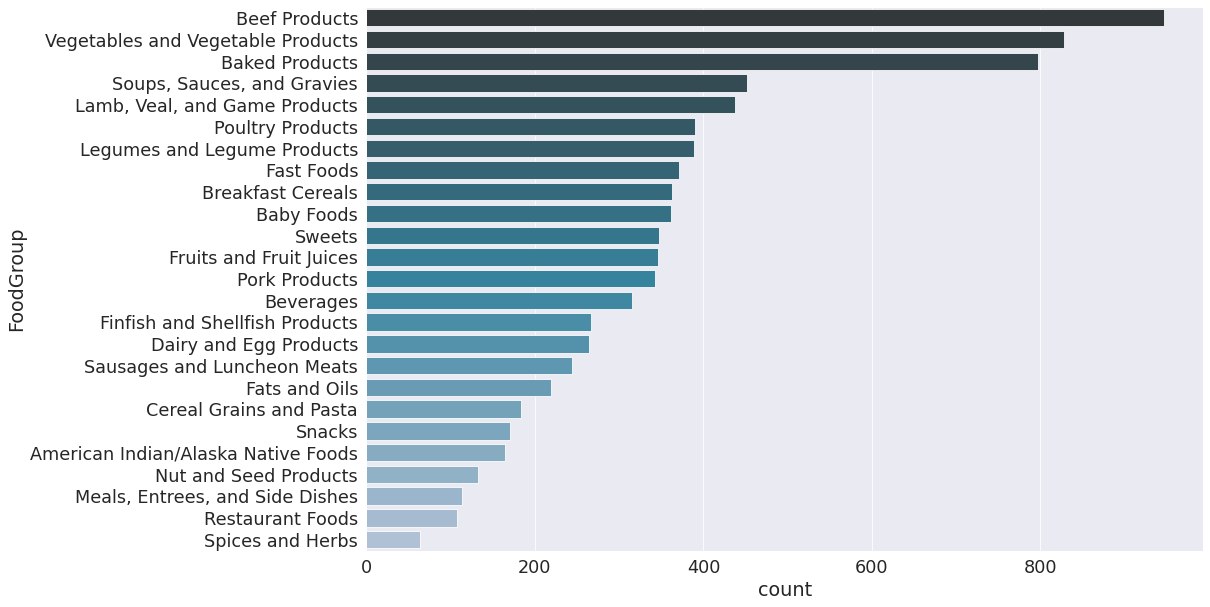

In [33]:
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2)     
plt.figure(figsize=(15, 10))
ax = sns.countplot(y="FoodGroup", data=nutricion,order = nutricion['FoodGroup'].value_counts().index, palette="PuBuGn_d")

En nutriciólos macronutrientes son aquellos nutrientes que suministran la mayor parte de la energía metabólica del cuerpo. Los principales son glúcidos, proteínas y lípidos.
los que tienen 0s y distribuciones feas son los micros


In [34]:
nutricion.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [35]:
nutricion.drop(nutricion.columns[nutricion.columns.str.contains('_USRDA')].values, 
        inplace=True, axis=1)

In [36]:
macronutrientes = ['Carb_g','Energy_kcal','Fat_g','Protein_g','Sugar_g']
micronutrientes = ['Calcium_mg','Fiber_g','Copper_mcg','Folate_mcg','Iron_mg','Magnesium_mg','Manganese_mg','Niacin_mg','Phosphorus_mg','Riboflavin_mg',
                   'Selenium_mcg','Thiamin_mg','VitA_mcg','VitB6_mg','VitB12_mcg','VitC_mg','VitE_mg','Zinc_mg']

In [37]:
macro = nutricion
#macro.head()
macro = macro[macronutrientes]
macro.head()

Carb_g  Energy_kcal  Fat_g  Protein_g  Sugar_g
0    0.06          717  81.11       0.85     0.06
1    0.06          717  81.11       0.85     0.06
2    0.00          876  99.48       0.28     0.00
3    2.34          353  28.74      21.40     0.50
4    2.79          371  29.68      23.24     0.51

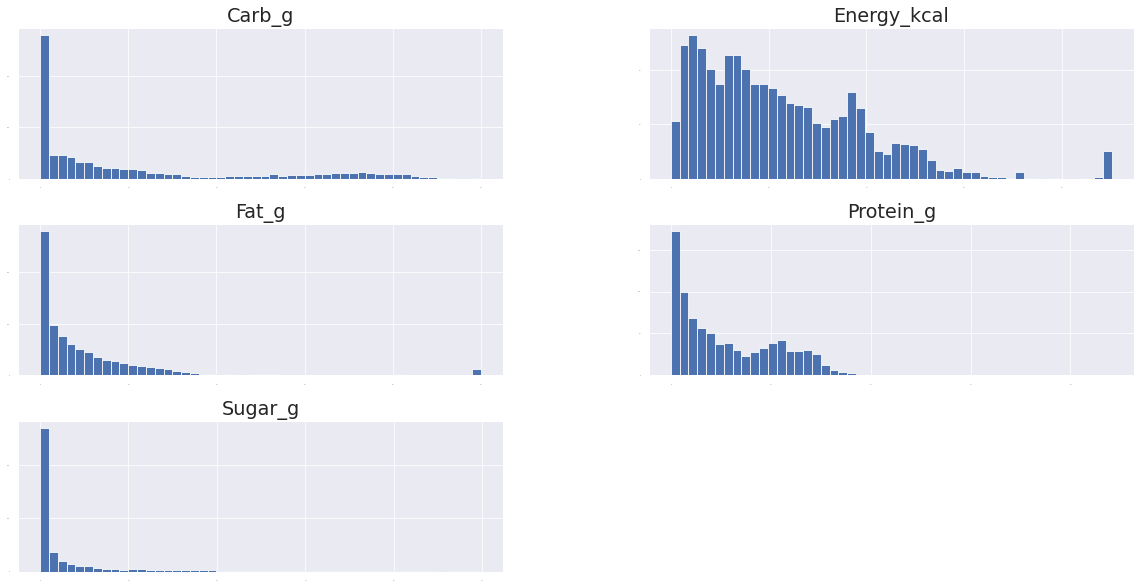

In [38]:
ax = macro.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(20,10))

In [39]:
micro = nutricion
#macro.head()
micro = micro[micronutrientes]
micro.head()

Calcium_mg  Fiber_g  Copper_mcg  Folate_mcg  Iron_mg  Magnesium_mg  \
0          24      0.0       0.000           3     0.02             2   
1          24      0.0       0.016           3     0.16             2   
2           4      0.0       0.001           0     0.00             0   
3         528      0.0       0.040          36     0.31            23   
4         674      0.0       0.024          20     0.43            24   

   Manganese_mg  Niacin_mg  Phosphorus_mg  Riboflavin_mg  Selenium_mcg  \
0         0.000      0.042             24          0.034           1.0   
1         0.004      0.042             23          0.034           1.0   
2         0.000      0.003              3          0.005           0.0   
3         0.009      1.016            387          0.382          14.5   
4         0.012      0.118            451          0.351          14.5   

   Thiamin_mg  VitA_mcg  VitB6_mg  VitB12_mcg  VitC_mg  VitE_mg  Zinc_mg  
0       0.005       684     0.003        0.17      0.0     2.32     0.09  
1       0.005       684     0.003        0.13      0.0     2.32     0.05  
2       0.001       840     0.001        0.01      0.0     2.80     0.01  
3       0.029       198     0.166        1.22      0.0     0.25     2.66  
4       0.014       292     0.065        1.26      0.0     0.26     2.60

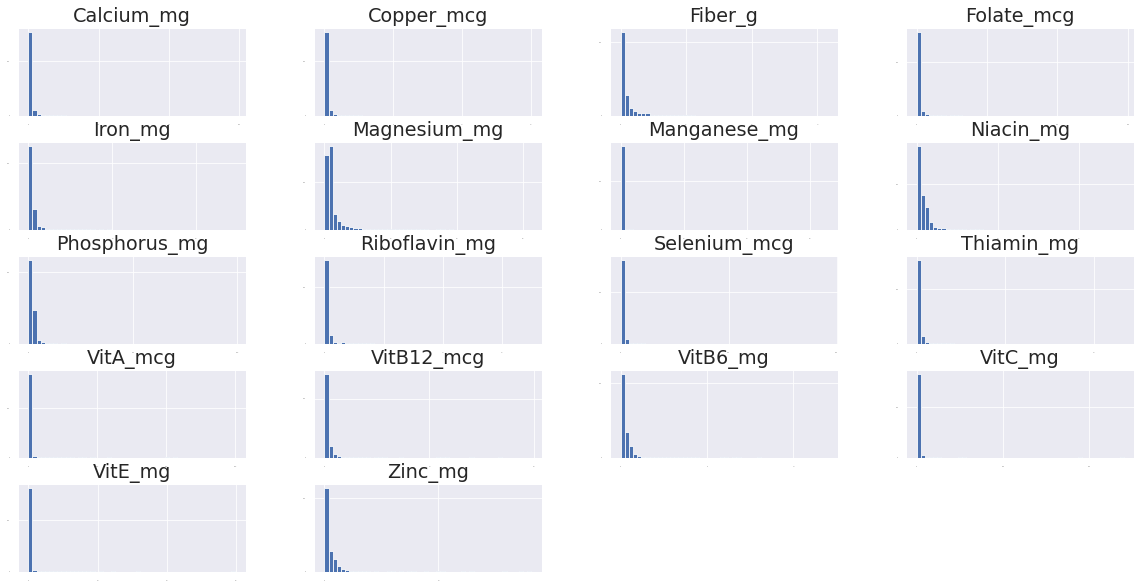

In [40]:
#ax.set_xlim(0,3)
ax = micro.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(20,10))
#ax.set(xlim=(0,1))

<ipython-input-41-9dc65a6a0fc0>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

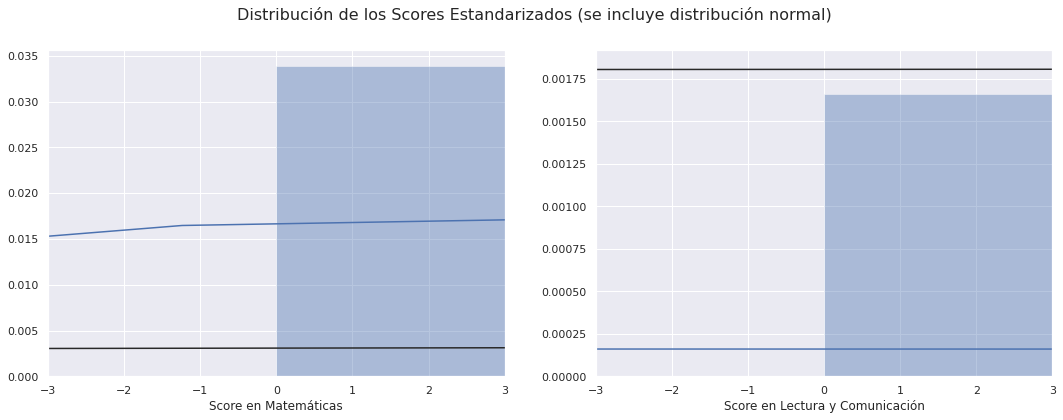

In [41]:
from scipy.stats import norm
sns.set(style="darkgrid")
fig=plt.figure()
fig,axes=plt.subplots(1,2, figsize=(18,6), sharex=True)
sns.distplot(nutricion[macronutrientes], ax=axes[0], fit=norm, axlabel="Score en Matemáticas")
sns.distplot(nutricion[micronutrientes], ax=axes[1], fit=norm, axlabel="Score en Lectura y Comunicación")
plt.xlim(-3, 3)
fig.suptitle('Distribución de los Scores Estandarizados (se incluye distribución normal)', fontsize=16)
fig.show()

In [42]:
nutricion = nutricion.drop(columns=['ID','FoodGroup','ShortDescrip','Descrip','CommonName','MfgName','ScientificName'])

In [43]:
nutricion.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

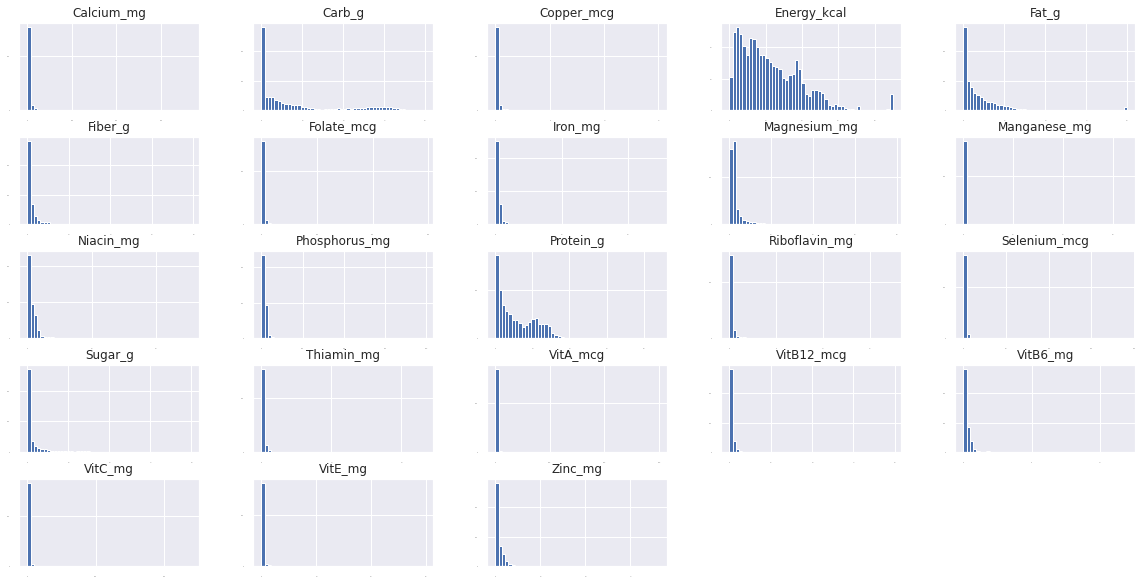

In [44]:
ax = nutricion.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(20,10))

In [45]:
nutricion.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

**sistema mexicano de equivalentes**


In [46]:
from scipy.stats import boxcox
# add 1 because data must be positive (we have many zeros)
nutricion = nutricion + 1
df_TF = pd.DataFrame(index=nutricion.index)
for i in nutricion.columns.values:
    df_TF["%s_TF" % i] = boxcox(nutricion.loc[:, i])[0]

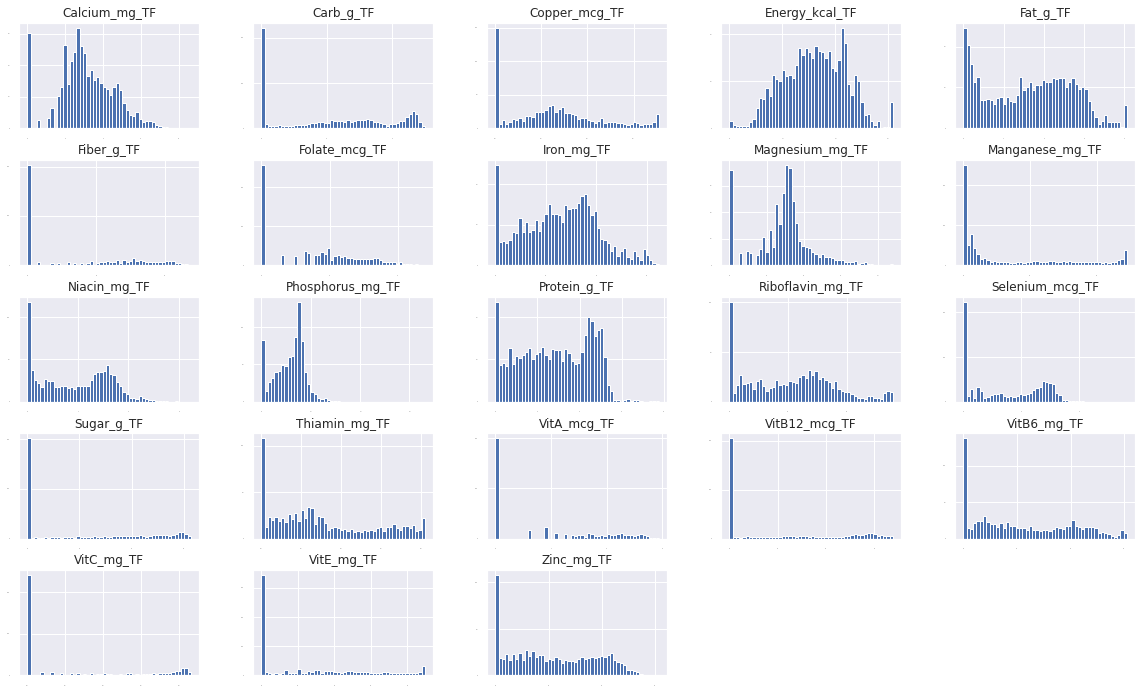

In [47]:
ax = df_TF.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(20,12))